# COVID-Team-1
## Dr. Mohanty
## Katelynn Urgitus
## CSC 405-01
## Last Updated: 09/21/2020
## I, Katelynn Urgitus, have abided by the UNCG Academic Integrity Policy.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
In this notebook we will be looking at the $\color{green}{\text{COVID-19 Data}}$ for the whole USA

Then merge the $\color{green}{\text{COVID-19 Data}}$ with the $\color{blue}{\text{Hospital}}$ Enrichment set

And finally take a look at $\color{green}{\text{COVID-19 Data}}$ trends for the last week in $\color{purple}{\text{Pennsylvania}}$
### -------------------------------------------------------------------------------------------------------------------------------------------------------------

Changing the directory to gain access to our $\color{green}{\text{COVID-19 Data}}$ files

In [1]:
cd ..

C:\Users\katel\Desktop\UNCG\Fall_2020\CSC405\FinalProject\COVID-Team-1\src


Adding imports for our $\color{green}{\text{COVID-19 Data}}$ notebook and to be able to display the data

In [2]:
import ipynb
from ipynb.fs.full.covid_data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Setting our Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

First we need to make sure we have an up to date *covid_primary_data.csv* using our update function

Then we can check it using our get method

In [3]:
covid_primary_data_to_csv()

Lets calculate the trend for the last week of data

In [4]:
df = pd.read_csv("../data/Covid/covid_primary_data.csv")
df.head()

   countyFIPS   County Name_x State_x  stateFIPS_x  cases - 1/22/20  \
0        1001  Autauga County      AL            1                0   
1        1003  Baldwin County      AL            1                0   
2        1005  Barbour County      AL            1                0   
3        1007     Bibb County      AL            1                0   
4        1009   Blount County      AL            1                0   

   cases - 1/23/20  cases - 1/24/20  cases - 1/25/20  cases - 1/26/20  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   cases - 1/27/20  ...  deaths - 9/10/20  deaths - 9/11/20  deaths - 9/12/20  \
0                0  ...                24            

In [5]:
# Grouping and creating our last week column list
covid_grouped = df.groupby(df.State_x)
last_week = ['cases - 9/10/20','cases - 9/11/20', 
             'cases - 9/12/20', 'cases - 9/13/20',
             'cases - 9/14/20', 'cases - 9/15/20', 
             'cases - 9/16/20']

Instead of looking at every county, we will only look at the top 5 counties for each state

In [6]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

In [7]:
top5Counties = covid_grouped.apply(top, column=last_week, n=5)[['County Name_x', 'cases - 9/10/20','cases - 9/11/20', 
             'cases - 9/12/20', 'cases - 9/13/20',
             'cases - 9/14/20', 'cases - 9/15/20', 
             'cases - 9/16/20' ]]
top5Counties.head(10)

                           County Name_x  cases - 9/10/20  cases - 9/11/20  \
State_x                                                                      
AK      69     Municipality of Anchorage             3411             3450   
        74  Fairbanks North Star Borough              804              836   
        83     Matanuska-Susitna Borough              520              529   
        78       Kenai Peninsula Borough              425              426   
        77    City and Borough of Juneau              218              223   
AL      36              Jefferson County            17736            17908   
        48                 Mobile County            12711            12749   
        50             Montgomery County             8310             8349   
        44                Madison County             6965             7057   
        62             Tuscaloosa County             6525             6590   

            cases - 9/12/20  cases - 9/13/20  cases - 9/14/20  

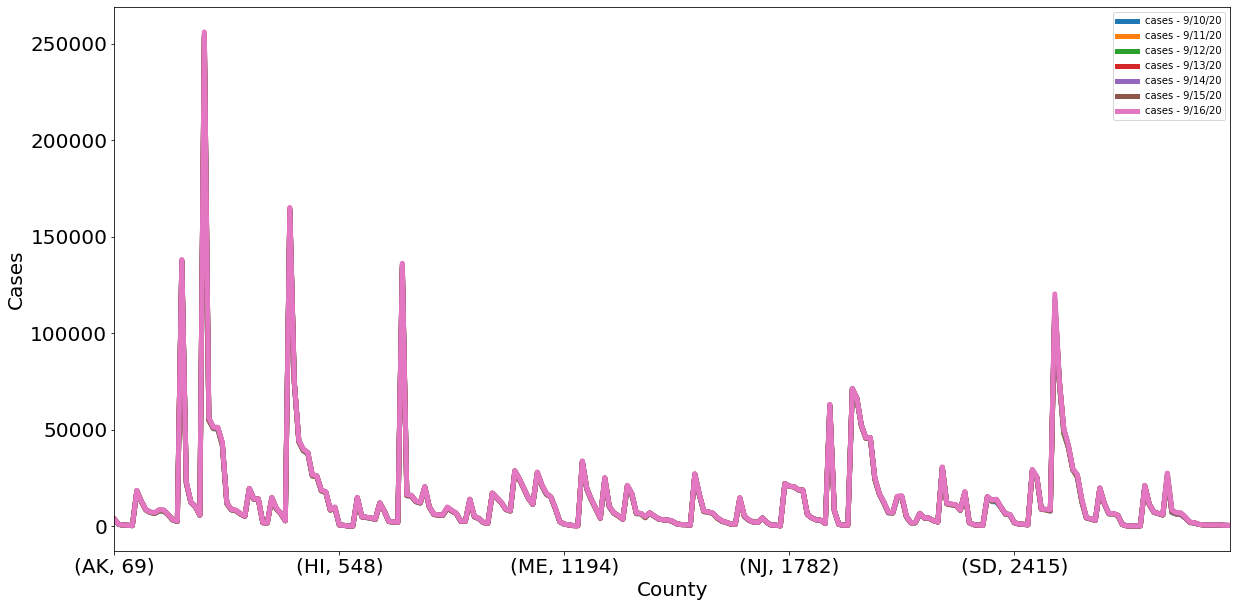

In [8]:
top5Counties[last_week].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xlabel('County', fontsize=20);

Overall, we can see $\color{red}{\text{very little}}$ change between dates for the last week 

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
Let's begin to merge our $\color{green}{\text{COVID-19 Data}}$ and $\color{blue}{\text{Hospital}}$

Now we can display our $\color{blue}{\text{Hospital}}$

In [ ]:
get_county_hospital().head()

Finally we merge our $\color{blue}{\text{Hospital}}$ with our $\color{green}{\text{COVID-19 Data}}$ using an outer merge to ensure that we include the multiple entries per county

In [ ]:
hospital_merged_covid = pd.merge(get_covid_primary_data(), \
                                get_county_hospital(), \
                                how = 'outer')
hospital_merged_covid.to_csv("../data/Hospitals/hospital_merged_covid.csv", index=False)

Now we should be able to see the combined data table

In [ ]:
hospitals_cvd = pd.read_csv("../data/Hospitals/hospital_merged_covid.csv")
hospitals_cvd.head()

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
Let's take a look at $\color{purple}{\text{Pennsylvania}}$

In [ ]:
pennsylvania_cvd = hospitals_cvd[hospitals_cvd["State_x"] == "PA"]

In [ ]:
# We now need to group by county so we can aggregate our data
penn_grouped = pennsylvania_cvd.groupby(pennsylvania_cvd.countyFIPS)

In [ ]:
# Aggregation of the grouped data
penn_counties = penn_grouped[last_week].agg(np.mean)
penn_counties.head()

In [ ]:
penn_counties.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xlabel('County', fontsize=20);

Much like the overall $\color{green}{\text{COVID-19 Data}}$, $\color{purple}{\text{Pennsylvania}}$ shows little difference across the week 

The cases are  $\color{red}{\text{increasing}}$ steadily over time